# Metropolis algorithm
Here I will show the power of the Metropolis Algorithm by applying in to a 1D Isling model lattice. 

The Isling model is a simplification of the spins of the lattice where the spins can only take values spin up and spin down. Here the spins are represented by the spin class and take the value of -1 (up) and -1 (down).

In [19]:

from metropolisAlgorithm import *
import matplotlib.pyplot as plt
%matplotlib inline

The metropolisAlgorithm file contains all the import statements needed to run a simulation on a 1D lattice.

In [20]:
config_ = {'range': [10e-3, 5.02], 'step': 0.2, 
           'lattice_size': 300,
          'temp': 1, 'num_rounds': 10000}

sim = metropolisAlgorithm(config_) 

In [21]:
sim.run()

After running the simulation the equilibrium times can be found by plottting the energy and magnetization, per spin, against Monte Carlo timesteps and selecting the value where these quanities stabilize.

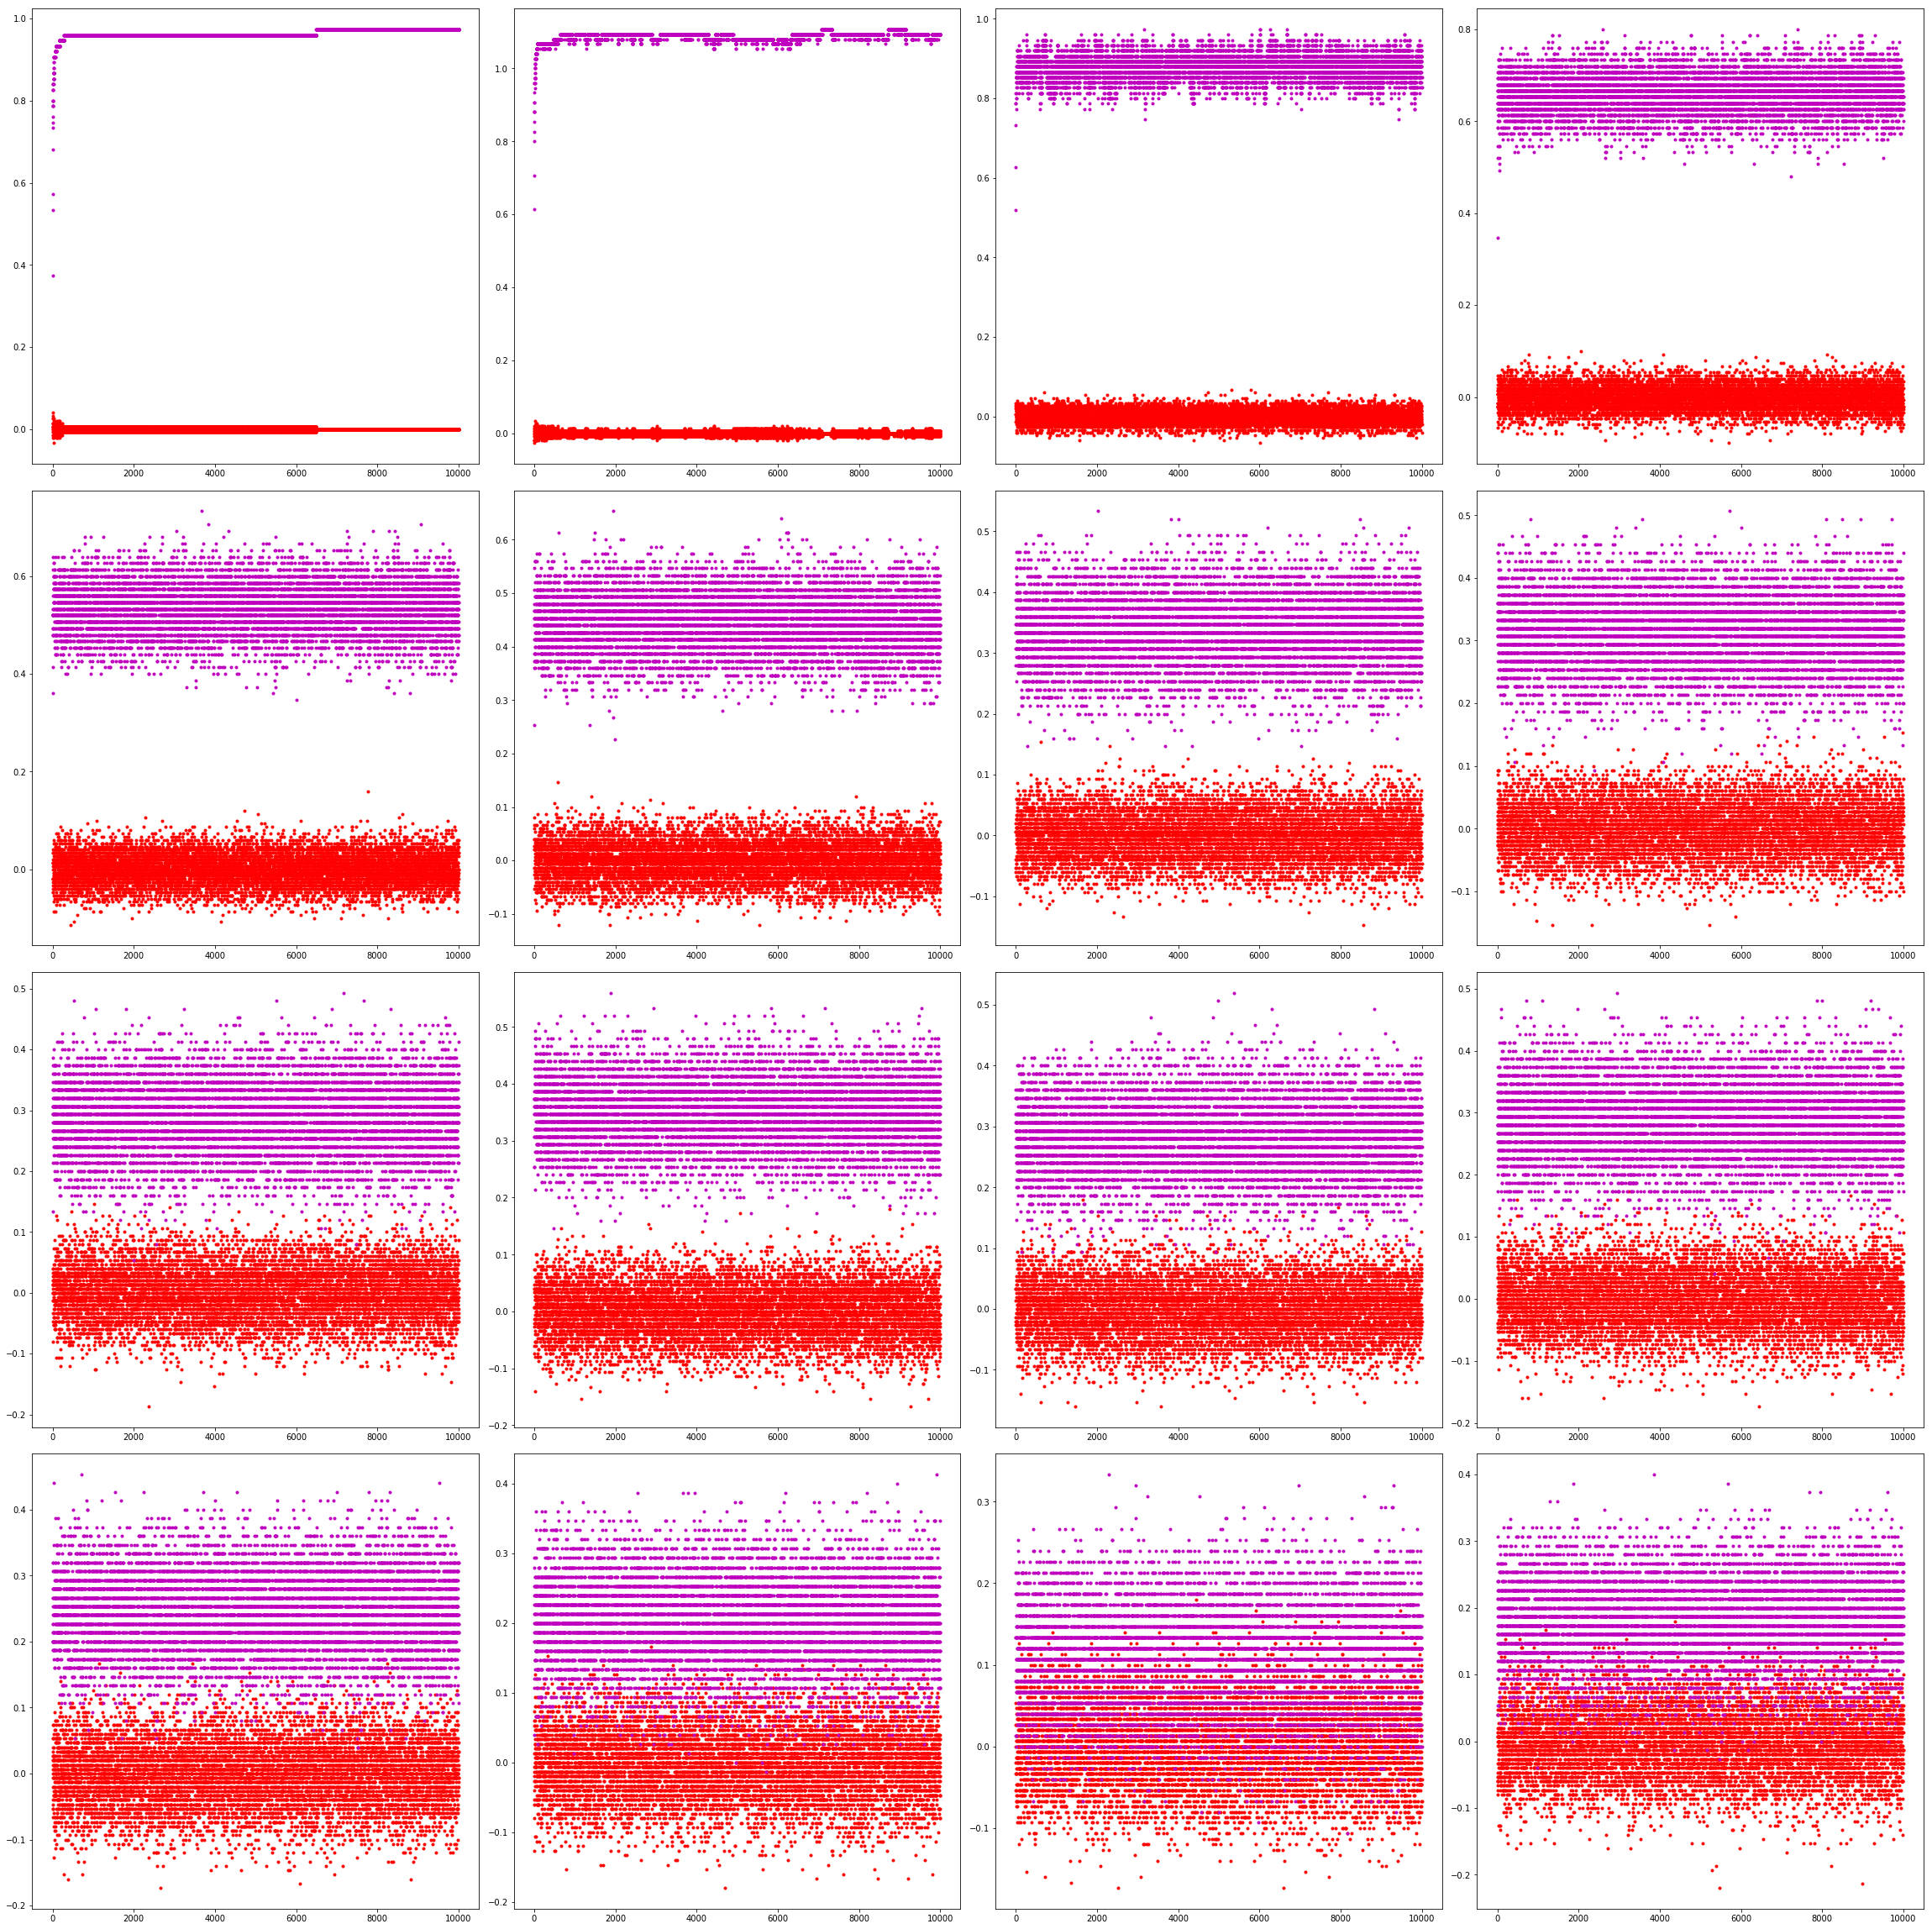

In [23]:
fig, ax = plt.subplots(nrows=4,ncols=4, figsize=(32, 32))
plt.tight_layout()

ax = ax.ravel()

for i in range(16):
    ax[i].plot(sim.final_magnetization[i], 'r.')
    ax[i].plot(sim.final_energy[i], 'm.')
plt.show()

## Correlation Time
We can see that most of the energies become stable at 2000 timesteps. This then is our equilibrium time.
From here on out only the data after the equilibrium time will be consisdered. Before computing the mean magnetizaation and other properties I will calculated the correlation time.

The correlation time, $\tau$ is the time between independent states of the lattice. The number of independent states is then given by $$n = \frac{t_{sim}}{2\tau}$$. Where $t_{sim}$ is tthe time of the entire simulation and the extra factor of 2 is for good measure to ensure the states are independent.

After finding the correlation time I will then compute the quanities of interests.

In [28]:
sim.equilib_time = [5000 for _ in sim.system]
sim.correlation_time() 

In [29]:
sim.correlation_times /= 100

## Measurements

In [34]:
sim.indep_meausurements()
sim.magnetization_per_site(True)
spec = sim.specific_heat()
sim.energy_per_spin(True)
sus_a = sim.suscepitbility()

In [31]:
def analytical_mps(beta, energy):
    """ The analytical solution for the magnetization per spin, for a 1D isling lattice. 
    
        With J = 1
        
        paramater
        beta: temperature
        energy: energy of the lattice
    """
    return np.sinh(beta * energy) / (np.sinh(beta * energy) ** 2 + np.exp(-4 * beta)) ** 1/2

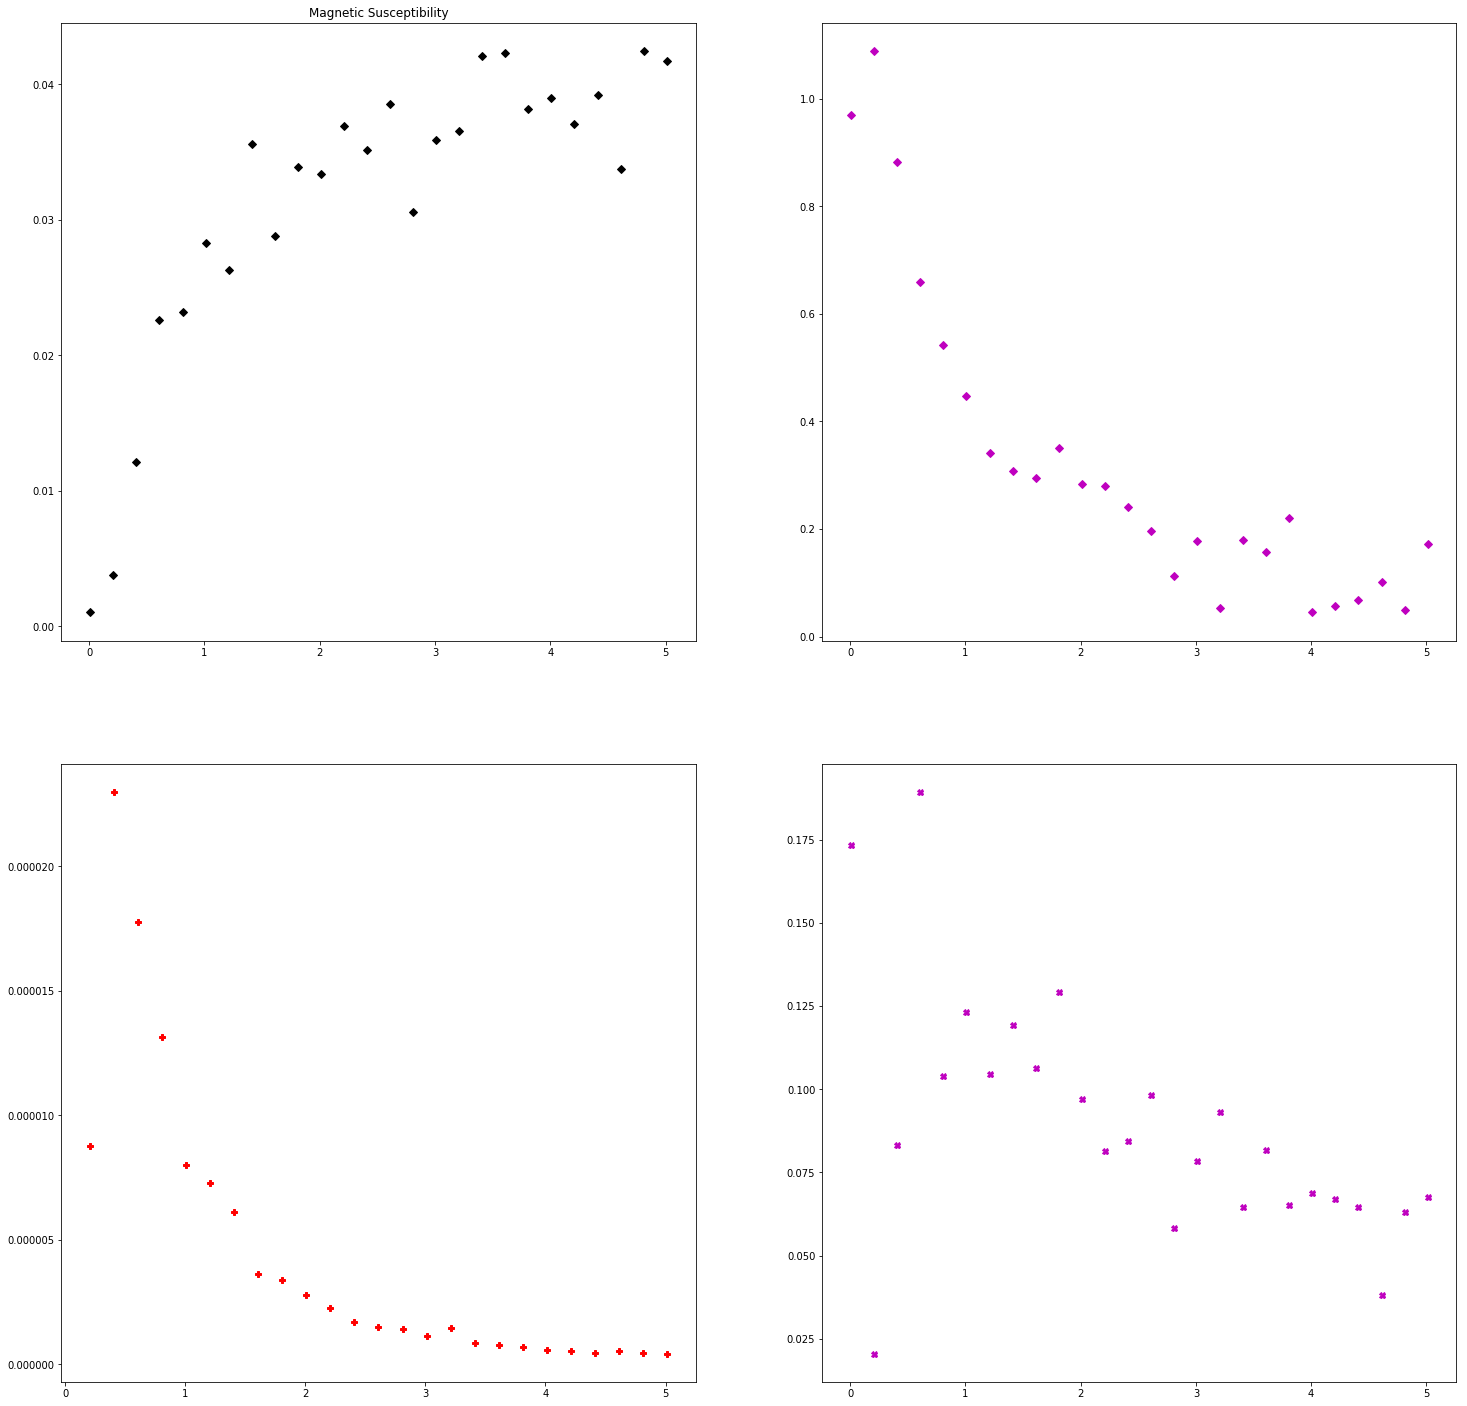

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
#plt.tight_layout()
ax = ax.ravel()

ax[0].plot(sim.temp, sim.mag_spin, 'kD')
ax[0].set_title("Magnetization Per spin")

ax[1].plot(sim.temp, sim.energy_spin, 'mD')
ax[0].set_title("Energy Per Spin")


ax[2].plot(sim.temp[1:], spec[1:], 'rP')
ax[0].set_title("Specific Heat")

ax[3].plot(sim.temp, sus_a, 'mX')
ax[0].set_title("Magnetic Susceptibility")

plt.show()